<center> <h1> Exploratory Data Analysis (EDA) </h1> </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Titanic dataset
df= sns.load_dataset('titanic')
print(df.shape)
display(df.head(2))

(891, 15)


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False

<center> <h2> Basic Information </h2> </center>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.isnull().sum()/len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

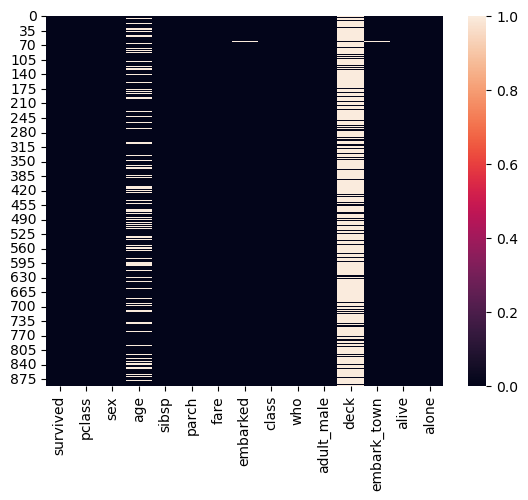

In [7]:
sns.heatmap(df.isnull())

<center> <h2> Assignment - I </h2> </center>

**Q1.** What is **`mean`**, **`median`**  and **`mode`**?

**Ans :**

* **Mean:** The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set. 
* **Median:** The median is the middle value when a data set is ordered from least to greatest. 
* **Mode:** The mode is the number that occurs most often in a data set.

<center> <h2> Assignment - II </h2> </center>

**Q2.** How to impute the missing values? Find our methods of imputing missing values?

**Ans :**

Imputing missing values is the process of filling in or estimating values for data points that are missing or undefined. Handling missing data is a crucial step in data preprocessing before analysis or modeling. There are several methods to impute missing values, and the choice of method depends on the nature of the data and the specific problem you are addressing. Here are some common methods for imputing missing values:

1. **Mean, Median, or Mode Imputation**:
> $\bullet$ For numeric data, you can replace missing values with the mean (average) of the available data for that feature. This method is known as mean imputation. <br> $\bullet$ For skewed data or data with outliers, using the median is often a better choice. This is known as median imputation. <br> $\bullet$ For categorical data, you can replace missing values with the mode (most common) value for that feature. This is called mode imputation.

- For mean imputation:
```python
df['column_name'].fillna(df['column_name'].mean(), inplace=True)
```

- For median imputation:
```python
df['column_name'].fillna(df['column_name'].median(), inplace=True)
```

- For mode imputation:
```python
df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)
```

2. **Constant Value Imputation**:
> $\bullet$ Replace missing values with a predefined constant value, such as 0 or -1. This is a simple and quick method but may not be appropriate for all situations.

- Replace missing values with a constant (e.g., 0):
```python
df['column_name'].fillna(0, inplace=True)
```

3. **Linear Regression Imputation**:
> $\bullet$ For numeric data, you can use a linear regression model to predict missing values based on the relationships with other variables in the dataset. This is a more advanced method and is suitable when there is a linear relationship between the feature with missing values and other features.

```python
from sklearn.linear_model import LinearRegression

# Separate data into two DataFrames: one with missing values and one without
df_missing = df[df['Y'].isnull()]
df_not_missing = df[~df['Y'].isnull()]

# Create a Linear Regression model
model = LinearRegression()

# Fit the model using the available data
X_train = df_not_missing[['X']]
y_train = df_not_missing['Y']
model.fit(X_train, y_train)

# Predict missing values using the fitted model
X_test = df_missing[['X']]
y_pred = model.predict(X_test)

# Fill in missing values with predicted values
df.loc[df['Y'].isnull(), 'Y'] = y_pred
```

4. **K-Nearest Neighbors (KNN) Imputation**:
> $\bullet$ KNN imputation involves finding the K nearest data points with complete information and averaging or taking the majority of their values to impute missing values. This method is effective when similar data points tend to have similar values.

```python
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['column_name'] = imputer.fit_transform(df[['column_name']])
```

5. **Interpolation and Extrapolation**:
> $\bullet$ For time series data, you can use interpolation or extrapolation techniques to estimate missing values based on the temporal patterns in the data.

```python
df['column_name'].interpolate(method='linear', inplace=True)
```

6. **Imputation with Statistical Models**:
> $\bullet$ Use statistical models like decision trees, random forests, or deep learning models to predict and impute missing values based on the relationships in the data.

```python
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mask = df['column_name'].isna()  # Create a boolean mask for missing values
X = df[~mask][['feature1', 'feature2']]  # Features used for prediction
y = df[~mask]['column_name']  # Target variable
model.fit(X, y)  # Train the model
df.loc[mask, 'column_name'] = model.predict(df[mask][['feature1', 'feature2']])  # Impute missing values
```

<center> <h2> Unique Values </h2> </center>

In [9]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [12]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [13]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [14]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [15]:
df['embark_town'].value_counts(dropna= False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [16]:
df.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [17]:
df.groupby('sex').mean()

survived    pclass        age     sibsp     parch       fare  \
sex                                                                    
female  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818   
male    0.188908  2.389948  30.726645  0.429809  0.235702  25.523893   

        adult_male     alone  
sex                           
female    0.000000  0.401274  
male      0.930676  0.712305

In [18]:
df.groupby('class')['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [19]:
df.groupby('survived')['fare'].mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

In [20]:
df.groupby(['survived', 'class'])['fare'].mean()

survived  class 
0         First     64.684007
          Second    19.412328
          Third     13.669364
1         First     95.608029
          Second    22.055700
          Third     13.694887
Name: fare, dtype: float64

In [22]:
df.groupby(['survived', 'sex'])['fare'].mean()

survived  sex   
0         female    23.024385
          male      21.960993
1         female    51.938573
          male      40.821484
Name: fare, dtype: float64

In [23]:
df.groupby(['survived', 'sex', 'who'])['fare'].mean()

survived  sex     who  
0         female  child    32.076113
                  woman    20.967174
          male    child    33.073905
                  man      21.490736
1         female  child    30.887800
                  woman    54.813801
          male    child    35.562700
                  man      42.076422
Name: fare, dtype: float64

In [24]:
df.groupby(['survived', 'who']).size()

survived  who  
0         child     34
          man      449
          woman     66
1         child     49
          man       88
          woman    205
dtype: int64

In [25]:
df.corr()

survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000

<Axes: >

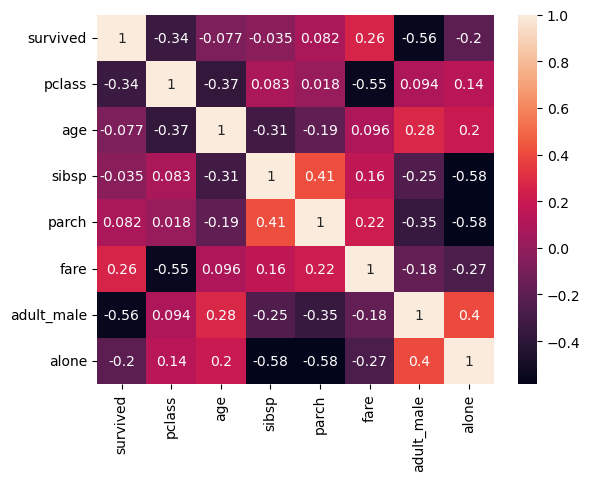

In [26]:
sns.heatmap(df.corr(), annot=True)

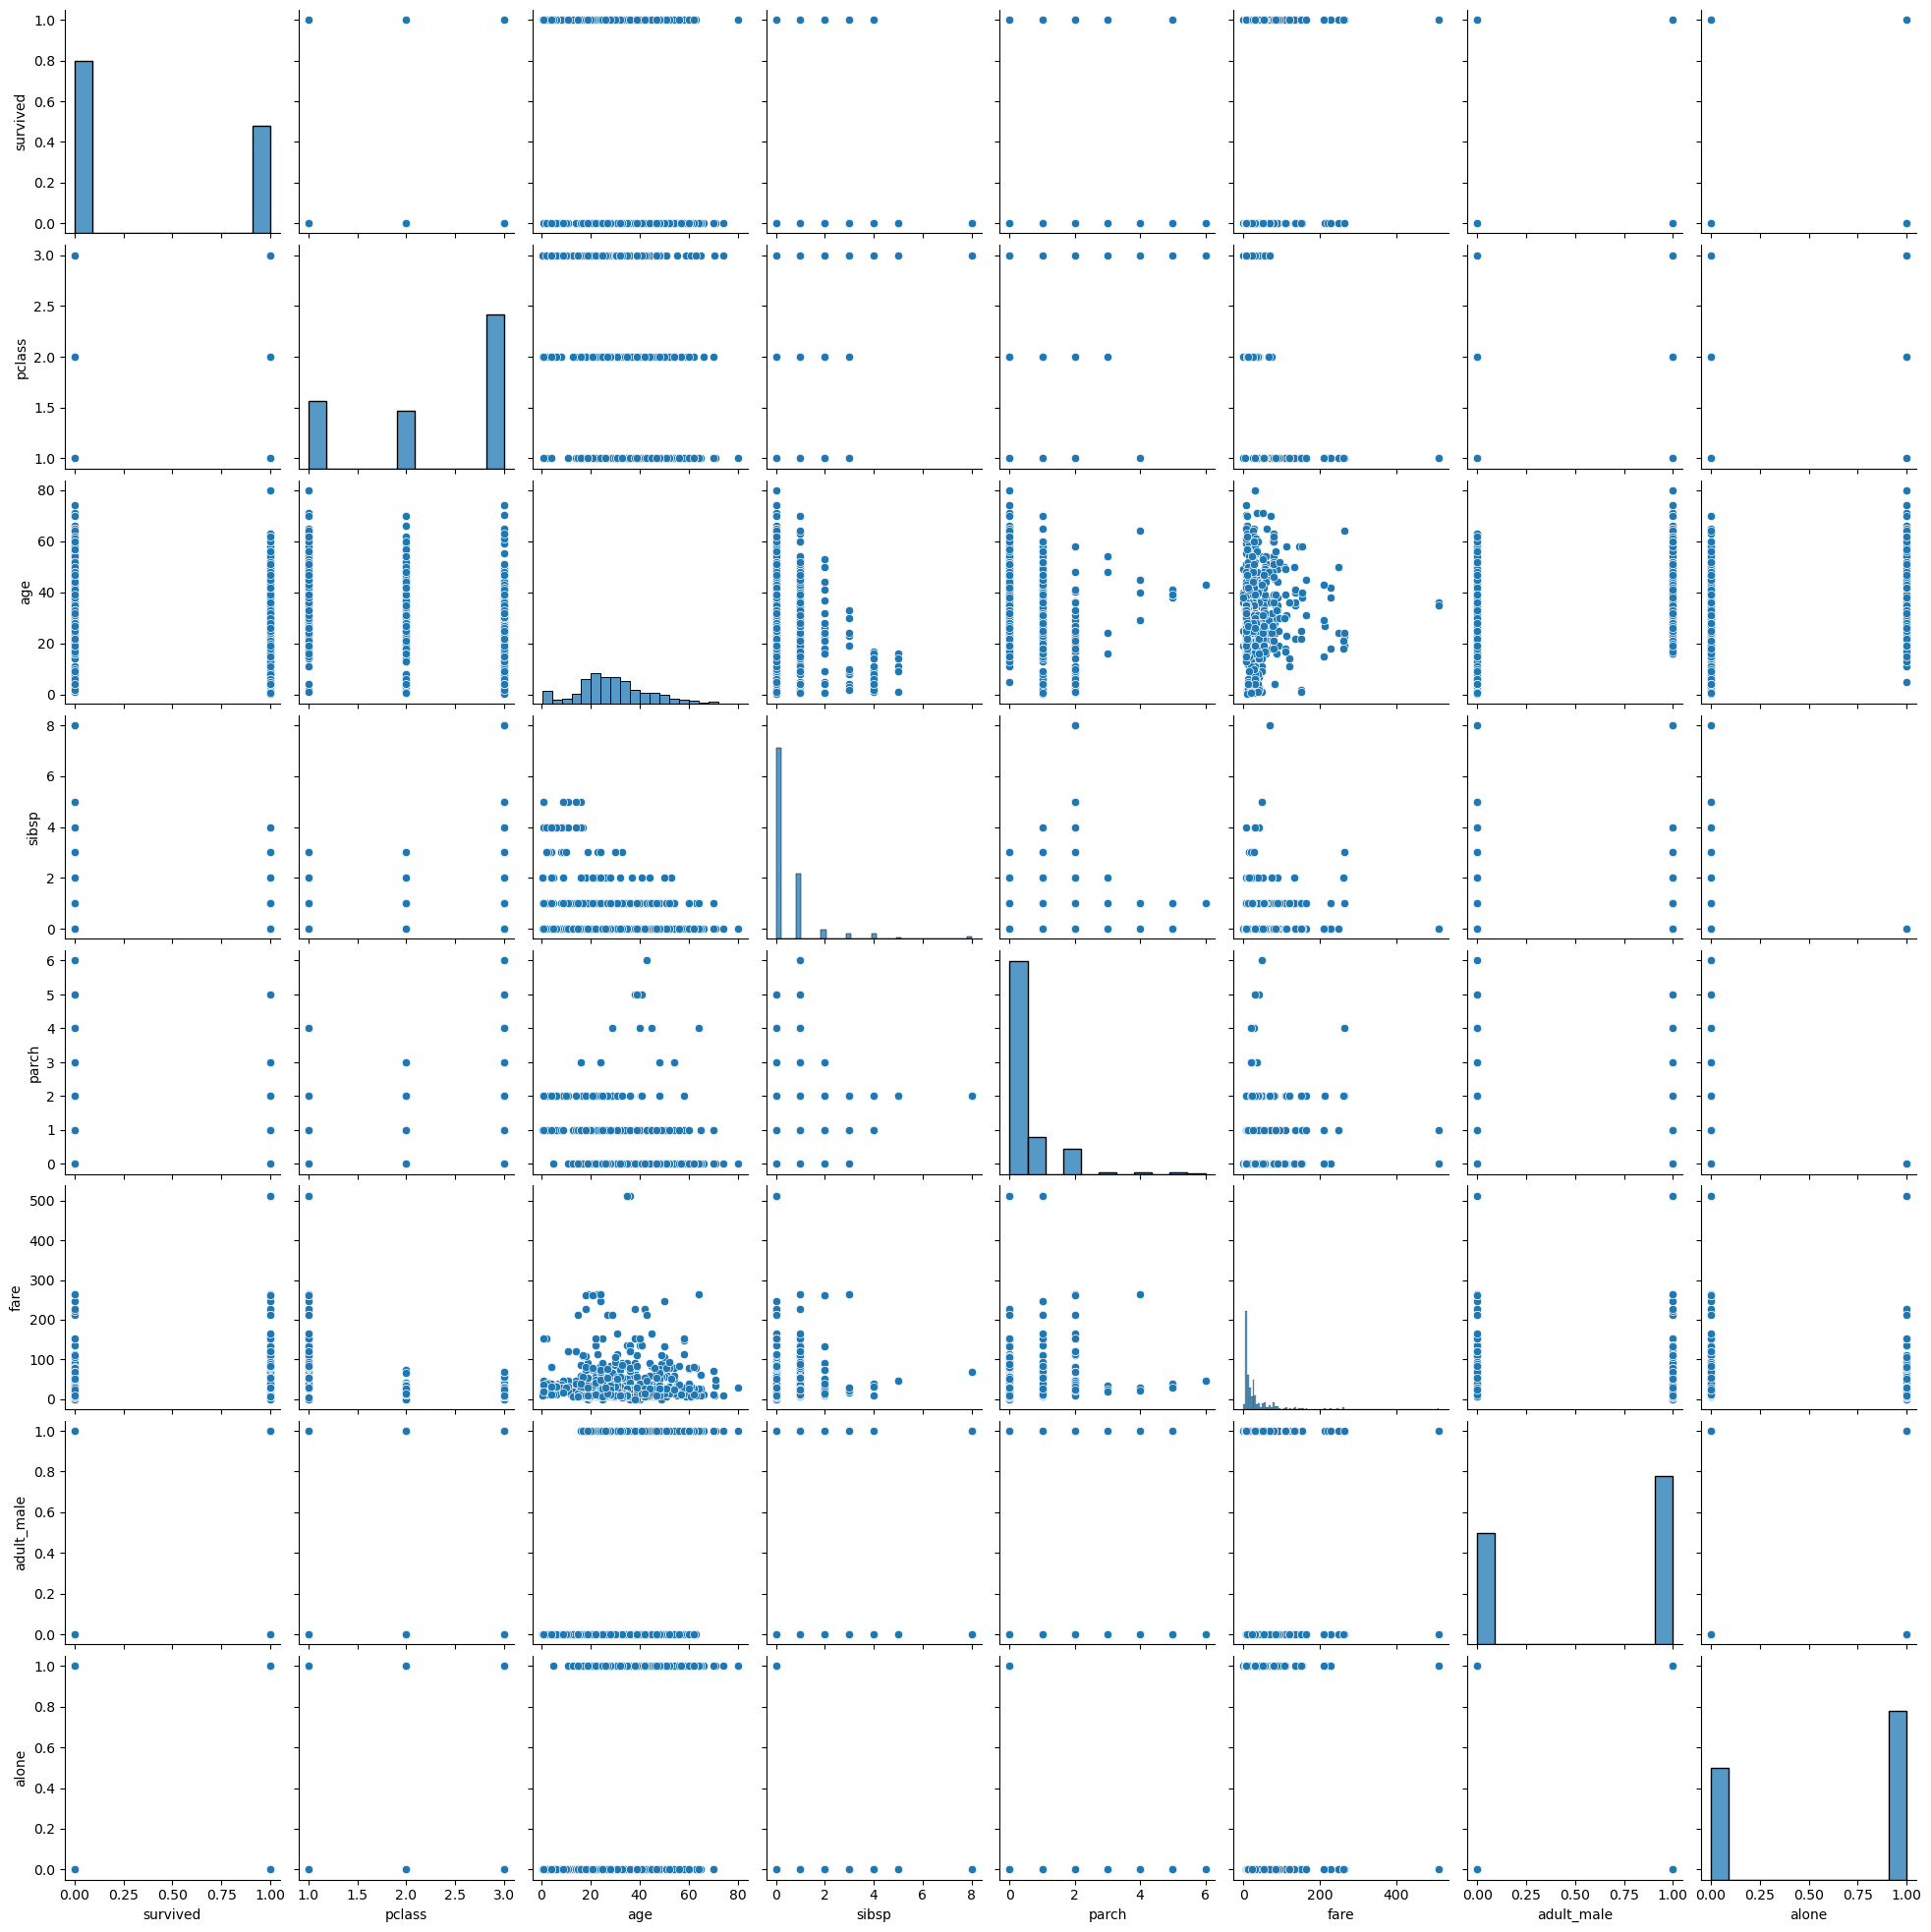

In [27]:
sns.pairplot(df)